# **Kaggle HW5: [xxtz28]**

**Remember to write your team name above, which MUST match your team name on Kaggle!!** Assignments without a team name will receive a 0/40 on the "accuracy on test data" component of this assignment's grade.

### **Load the Data**

In [ ]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_train.csv',
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_test.csv',
          'edx_test.csv')

### **Sample Code: Random Classifier**

**NOTE**: This classifier **DOES NOT** count as one of the 2 required for this assignment! It is merely here to illstrate how to submit your predictions.

See the Kaggle assignment (Data tab) for a description of each column in the dataset. You are creating a classifier to predict whether or not a student will get certified, stored in the `"certified"` column.

In [ ]:
import pandas as pd
from sklearn.dummy import DummyClassifier

# target = "certified" # target column

# This classifier returns labels sampled uniformly at random
# df_train = pd.read_csv('edx_train.csv')
# dummy_model = DummyClassifier(strategy="uniform")
# dummy_model.fit(df_train.drop(target, axis=1), df_train[target])

The code below generates predictions on the test set, and outputs the predictions into a CSV file.

In [ ]:
# Generate predictions on the test set
# df_test = pd.read_csv('edx_test.csv')
# predictions = dummy_model.predict(df_test)

# Save your predictions as a CSV
# to_save = df_test[['userid_DI']].copy()
# to_save.loc[:, 'certified'] = predictions
# to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

### **[5 Pts] Model Comparison**

**Instructions**: Run at least 2 different classification models. The classification models we have learned in class are: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html). For each model, try at least 2 different hyperparameter settings.

Then, make one or more visualizations that let you compare the models you trained. Sample visualizations you can make include confusion matrices, or graphs of train and validation accuracy/error. See past section and homework code for how to make these visualizations.

The goal is to train a model that accurately predicts whether students received their certification in the course for future student data examples of the same format.

#### Classification model 1: decision trees

*   preprocessing
*   model training
*   make predictions
*   Grid search



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

np.random.seed(416)

# load dataset
df_train = pd.read_csv('edx_train.csv')
print(len(df_train))
df_train.head()


8758


,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CS50x/2012,MHxPC130545492,1,1,1,1,United States,Master's,1984.0,m,3/10/13,7/29/13,1161.0,50.0,NaN,12.0,0
1,HarvardX/ER22x/2013_Spring,MHxPC130536944,1,1,1,1,United Kingdom,Master's,1985.0,f,3/13/13,8/1/13,1360.0,10.0,NaN,29.0,0
2,HarvardX/CS50x/2012,MHxPC130442298,1,1,1,1,India,NaN,NaN,NaN,8/2/12,7/25/13,77.0,18.0,NaN,7.0,0
3,HarvardX/ER22x/2013_Spring,MHxPC130273564,1,1,1,1,United Kingdom,Bachelor's,1982.0,m,1/23/13,8/13/13,1425.0,29.0,NaN,34.0,0
4,HarvardX/CS50x/2012,MHxPC130247761,1,1,0,0,United States,Secondary,1989.0,m,3/5/13,3/5/13,6.0,1.0,NaN,1.0,0


I am interested in the column 'certified' as the target/lablel values. In this column, 0 means not certified, 1 means certified. so i need to reassign it first. So:
*    +1 as certified,
*    -1 as not certified.
I will put it in a new cloumn 'certified' for the future reference.

In [ ]:
# check the initial distribution of certified:
print(len(df_train[df_train['certified'] == 1]))
print(len(df_train[df_train['certified'] == 0]))

3889
4869


In [ ]:
# now encode 1 remians 1, 0 becomes -1.
df_train['certified'] = df_train['certified'].apply(lambda x: -1 if x == 0 else 1)

print(len(df_train[df_train['certified'] == 1]))
print(len(df_train[df_train['certified'] == -1]))

3889
4869


In [ ]:
# Now, i want to explore the distribution of values for is_explored, so i can know how many is and not explored are present in the dataset.
only_is_certified = df_train[df_train['certified'] == 1]
only_not_certified = df_train[df_train['certified'] == -1]

print(f'Number of is certified course: {len(only_is_certified)} ({len(only_is_certified) * 100.0 / len(df_train):.2f}%)')
print(f'Number of not certified course: {len(only_not_certified)} ({len(only_not_certified) * 100.0 / len(df_train):.2f}%)')

Number of is certified course: 3889 (44.41%)
Number of not certified course: 4869 (55.59%)


In [ ]:
# feature selections (include both numeric and categorical values)
df_train.columns

Index(['course_id', 'userid_DI', 'registered', 'viewed', 'explored',
       'certified', 'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender',
       'start_time_DI', 'last_event_DI', 'nevents', 'ndays_act', 'nplay_video',
       'nchapters', 'nforum_posts'],
      dtype='object')

In [ ]:
df_train.replace('?', np.nan, inplace=True)

df_train = df_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Handle missing values
df_train['gender'].fillna('unknown', inplace=True)
df_train['LoE_DI'].fillna('unknown', inplace=True)
df_train['YoB'].fillna(df_train['YoB'].median(), inplace=True)
df_train['nplay_video'].fillna(0, inplace=True)

In [ ]:
# select features.

features = ['registered', 'viewed', 'explored', 'final_cc_cname_DI', 'LoE_DI',
            'YoB', 'gender', 'nevents', 'ndays_act', 'nplay_video',
            'nchapters', 'nforum_posts']

target = 'certified'

# Extract the feature columns and target column
df_train = df_train[features + [target]]
df_train.head()

,registered,viewed,explored,final_cc_cname_DI,LoE_DI,YoB,gender,nevents,ndays_act,nplay_video,nchapters,nforum_posts,certified
0,1,1,1,United States,Master's,1984.0,m,1161.0,50.0,0.0,12.0,0,1
1,1,1,1,United Kingdom,Master's,1985.0,f,1360.0,10.0,0.0,29.0,0,1
2,1,1,1,India,unknown,1986.0,unknown,77.0,18.0,0.0,7.0,0,1
3,1,1,1,United Kingdom,Bachelor's,1982.0,m,1425.0,29.0,0.0,34.0,0,1
4,1,1,0,United States,Secondary,1989.0,m,6.0,1.0,0.0,1.0,0,-1


In [ ]:
print("features: ", df_train.columns)

features:  Index(['registered', 'viewed', 'explored', 'final_cc_cname_DI', 'LoE_DI',
       'YoB', 'gender', 'nevents', 'ndays_act', 'nplay_video', 'nchapters',
       'nforum_posts', 'certified'],
      dtype='object')


In [ ]:
# since decision trees classifer only can handle numeric features, i need to use one-hot encoding to change the categorical to numeric ones. get_dummies is the function to do this.

# one-hot encoding
df_train = pd.get_dummies(df_train)

features = list(df_train.columns)
features.remove('certified')
features

['registered',
 'viewed',
 'explored',
 'YoB',
 'nevents',
 'ndays_act',
 'nplay_video',
 'nchapters',
 'nforum_posts',
 'final_cc_cname_DI_Australia',
 'final_cc_cname_DI_Bangladesh',
 'final_cc_cname_DI_Brazil',
 'final_cc_cname_DI_Canada',
 'final_cc_cname_DI_China',
 'final_cc_cname_DI_Colombia',
 'final_cc_cname_DI_Egypt',
 'final_cc_cname_DI_France',
 'final_cc_cname_DI_Germany',
 'final_cc_cname_DI_Greece',
 'final_cc_cname_DI_India',
 'final_cc_cname_DI_Indonesia',
 'final_cc_cname_DI_Japan',
 'final_cc_cname_DI_Mexico',
 'final_cc_cname_DI_Morocco',
 'final_cc_cname_DI_Nigeria',
 'final_cc_cname_DI_Other Africa',
 'final_cc_cname_DI_Other East Asia',
 'final_cc_cname_DI_Other Europe',
 'final_cc_cname_DI_Other Middle East/Central Asia',
 'final_cc_cname_DI_Other North & Central Amer., Caribbean',
 'final_cc_cname_DI_Other Oceania',
 'final_cc_cname_DI_Other South America',
 'final_cc_cname_DI_Other South Asia',
 'final_cc_cname_DI_Pakistan',
 'final_cc_cname_DI_Philippines',
 

In [ ]:
df_train.head()

In [ ]:
# split train and validation set.
train_data, val_data = train_test_split(df_train, test_size=0.2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Remove rows with missing values
train_data = train_data.dropna()
val_data = val_data.dropna()

# train initial model
dt = DecisionTreeClassifier(max_depth=5, random_state=7)

# Fit the training data to decision tree
dt.fit(train_data[features], train_data[target])

# Predict on the validation data
dt_val_pred = dt.predict(val_data[features])
dt_score = dt.score(val_data[features], val_data[target])

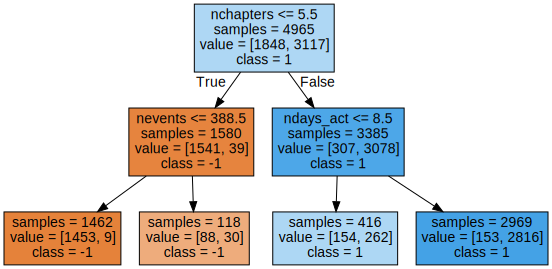

In [ ]:
# visualize the tree
import graphviz
from sklearn import tree

def draw_tree(tree_model, features):

    tree_data = tree.export_graphviz(tree_model,
                                    impurity=False,
                                    feature_names=features,
                                    class_names=tree_model.classes_.astype(str),
                                    filled=True,
                                    out_file=None)
    graph = graphviz.Source(tree_data)
    display(graph)

small_tree_model = DecisionTreeClassifier(max_depth=2, random_state=0)
small_tree_model.fit(train_data[features], train_data[target])
draw_tree(small_tree_model, features)

In [ ]:
# use GridsearchCV to find the best settings of hyperparameters
from sklearn.model_selection import GridSearchCV

hyperparameters = {'min_samples_leaf': [5,10,100], 'max_depth': [2,10,30]}

search = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = hyperparameters,
    cv=7,
    return_train_score=True
    )

search.fit(train_data[features], train_data[target])
print(search.best_params_)

{'max_depth': 30, 'min_samples_leaf': 5}


In [ ]:
# Train model with best parameters
dt_best_model = search.best_estimator_
dt_best_model.fit(train_data[features], train_data[target])

# Predict on validation data with best model
dt_val_best_pred = dt_best_model.predict(val_data[features])
dt_val_best_score = dt_best_model.score(val_data[features], val_data[target])
print("Validation accuracy of the best Decision Tree model:", dt_val_best_score)

Validation accuracy of the best Decision Tree model: 0.9504065040650407


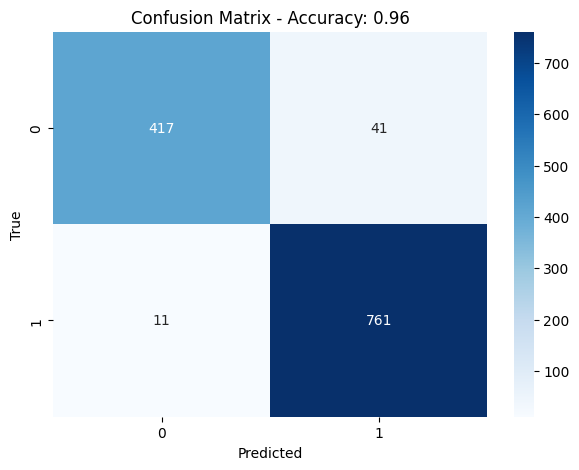

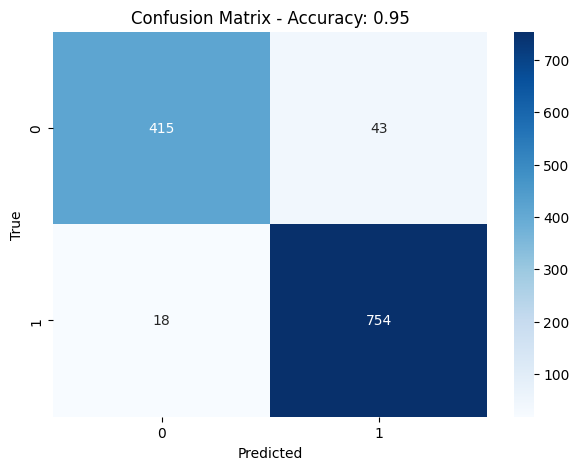

In [ ]:
# Function to visualize the confusion matrix
def visualize_confusion_matrix(y_true, y_pred, score):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Accuracy: {score:.2f}')
    plt.show()

# Visualize the confusion matrix for two models
visualize_confusion_matrix(val_data[target], dt_val_pred, dt_score)
visualize_confusion_matrix(val_data[target], dt_val_best_pred, dt_val_best_score)


<Figure size 500x300 with 0 Axes>

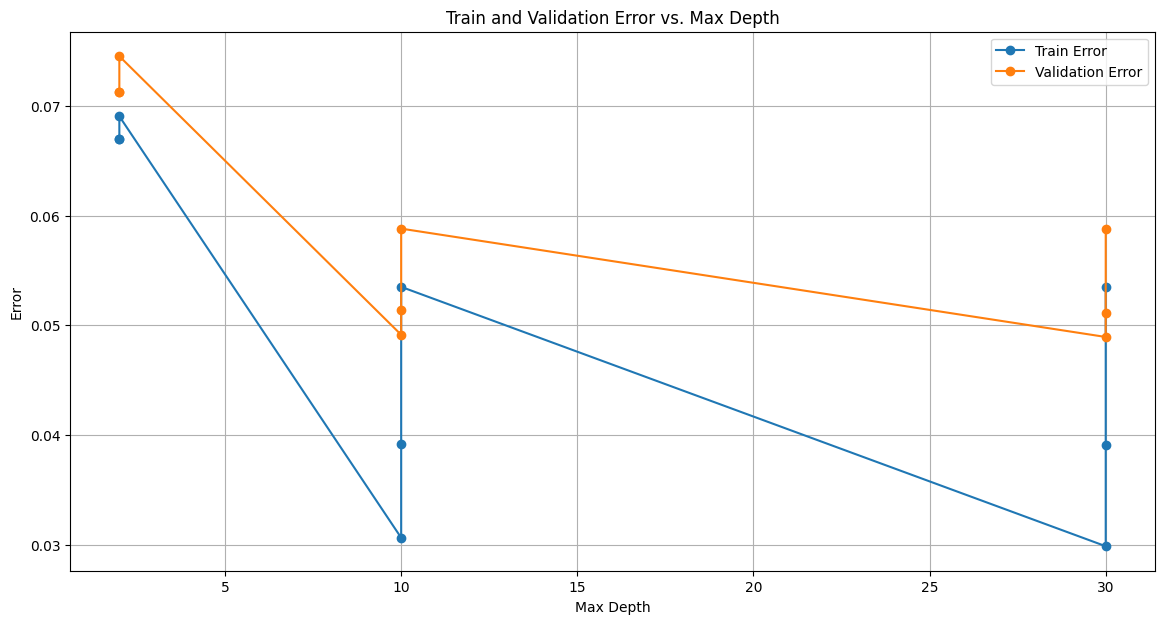

In [ ]:
results = search.cv_results_
plt.figure(figsize=(5, 3))

# Ensure the results contain numeric values for plotting
import numpy as np

train_error = 1 - results['mean_train_score']
val_error = 1 - results['mean_test_score']

# Check if the parameter grid results are numeric
plt.figure(figsize=(14, 7))
plt.plot(results['param_max_depth'], train_error, label='Train Error', marker='o')
plt.plot(results['param_max_depth'], val_error, label='Validation Error', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Train and Validation Error vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()


#### Classification model 2: K-NN

I can basically use the same preprocessing and one-hot encodings, target and features for the decision trees set above, so no need to repeat.

In [ ]:
# initial model

import sklearn
from sklearn.neighbors import KNeighborsClassifier

knn1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)

knn1.fit(train_data[features], train_data[target])

knn1_val_pred = dt.predict(val_data[features])
knn1_score = dt.score(val_data[features], val_data[target])

print(f'accuracy for the initial knn model: {knn1_score}')

accuracy for the initial knn model: 0.9585365853658536



Best n_neighbors setting is 3 with Cross-Validation Accuracy of 0.9000998941462598
Validation Accuracy of best KNN model: 0.908130081300813


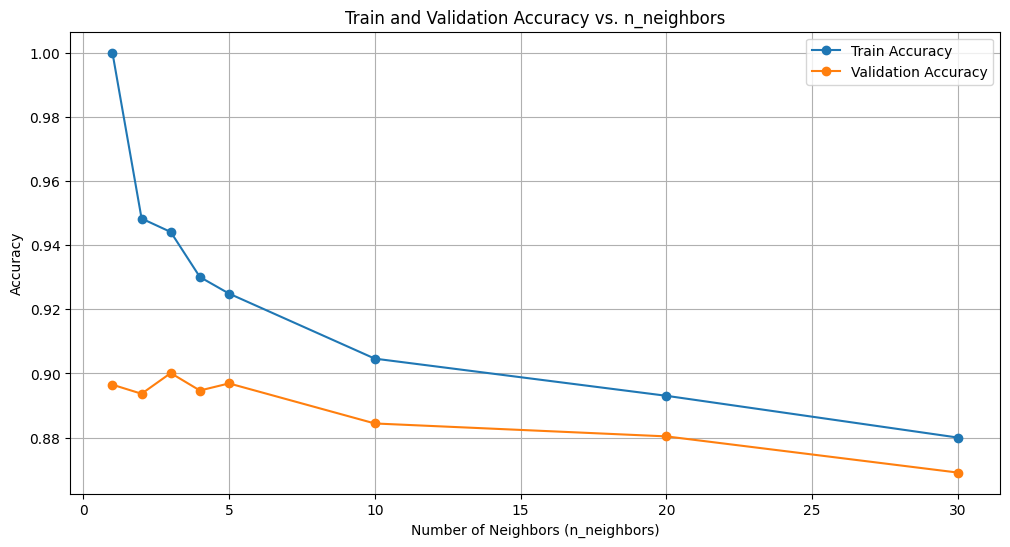

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the parameter grid
param_grid = {'knn__n_neighbors': [1, 2, 3, 4, 5, 10, 20, 30]}

# Create a pipeline with an imputer and a KNN classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=7, return_train_score=True)

# Fit GridSearchCV
grid_search.fit(train_data[features], train_data[target])

# get the best model:
best_knn = grid_search.best_estimator_
best_n_neighbors = grid_search.best_params_['knn__n_neighbors']
best_cross_val_score = grid_search.best_score_

print(f"\nBest n_neighbors setting is {best_n_neighbors} with Cross-Validation Accuracy of {best_cross_val_score}")

# Predict and evaluate on validation data
val_y_pred = best_knn.predict(val_data[features])
knn_best_val_score = accuracy_score(val_data[target], val_y_pred)
print(f"Validation Accuracy of best KNN model: {knn_best_val_score}")

# Plot train and validation accuracy scores
results = grid_search.cv_results_
plt.figure(figsize=(12, 6))
plt.plot(param_grid['knn__n_neighbors'], results['mean_train_score'], marker='o', label='Train Accuracy')
plt.plot(param_grid['knn__n_neighbors'], results['mean_test_score'], marker='o', label='Validation Accuracy')
plt.title('Train and Validation Accuracy vs. n_neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### **Compare models**#

Decision Tree Validation Accuracy: 0.9504065040650407
Decision Tree Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.99      0.97       772
           1       0.98      0.91      0.94       458

    accuracy                           0.96      1230
   macro avg       0.96      0.95      0.95      1230
weighted avg       0.96      0.96      0.96      1230



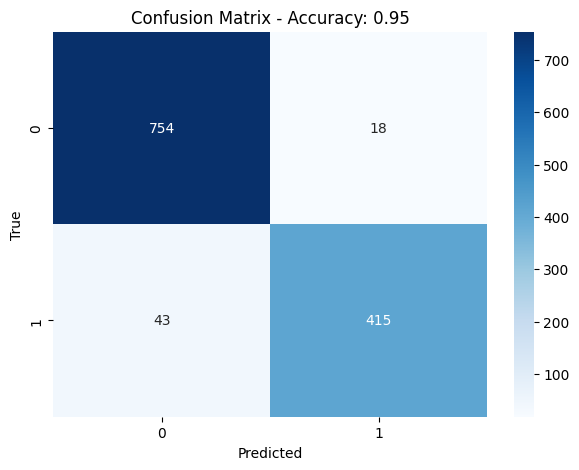

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def visualize_confusion_matrix(y_true, y_pred, score):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Accuracy: {score:.2f}')
    plt.show()

# decision tree best accuracy score
print("Decision Tree Validation Accuracy:", dt_val_best_score)
print("Decision Tree Classification Report:\n", classification_report(val_data[target], dt_val_pred))
visualize_confusion_matrix(val_data[target], dt_val_best_pred, dt_val_best_score)

K-NN Validation Accuracy: 0.908130081300813
K-NN Classification Report:
               precision    recall  f1-score   support

          -1       0.93      0.93      0.93       772
           1       0.88      0.88      0.88       458

    accuracy                           0.91      1230
   macro avg       0.90      0.90      0.90      1230
weighted avg       0.91      0.91      0.91      1230



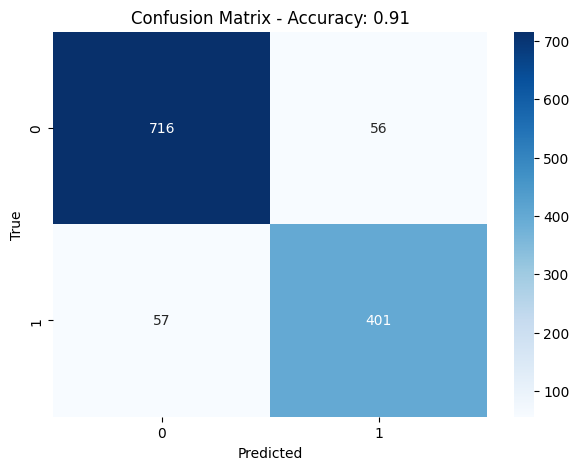

In [ ]:
# k-NN best accuracy score
print(f"K-NN Validation Accuracy: {knn_best_val_score}")
print("K-NN Classification Report:\n", classification_report(val_data[target], val_y_pred))
visualize_confusion_matrix(val_data[target], val_y_pred, knn_best_val_score)

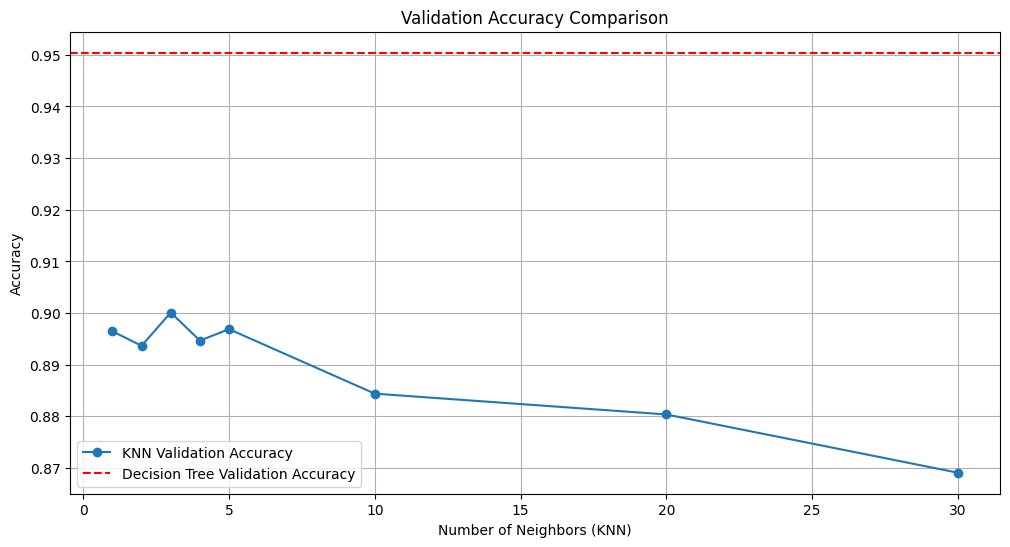

In [ ]:
# Plot the accuracy scores
plt.figure(figsize=(12, 6))
plt.plot(param_grid['knn__n_neighbors'], grid_search.cv_results_['mean_test_score'], marker='o', label='KNN Validation Accuracy')
plt.axhline(y=dt_val_best_score, color='r', linestyle='--', label='Decision Tree Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Number of Neighbors (KNN)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# compare accuracies
if dt_val_best_score> knn_best_val_score:
    best_model = dt_best_model
    print("Decision Tree is the best model with validation accuracy:", dt_val_best_score)
else:
    best_model = best_knn
    print("KNN is the best model with validation accuracy of", knn_best_val_score)

Decision Tree is the best model with validation accuracy: 0.9504065040650407


#### Preprocess test set and submissions

In [ ]:
df_test = pd.read_csv('edx_test.csv')

# Save the userid_DI column beforehand
to_save = df_test[['userid_DI']].copy()

# run the prediction
## preprocess test set like did in train set
df_test = df_test.applymap(lambda x: int(x) if isinstance(x, bool) else x)
df_test['gender'].fillna('unknown', inplace=True)
df_test['LoE_DI'].fillna('unknown', inplace=True)
df_test['YoB'].fillna(df_test['YoB'].median(), inplace=True)
df_test['nplay_video'].fillna(0, inplace=True)
df_test.replace('?', np.nan, inplace=True)

## One-hot encode test data
df_test = pd.get_dummies(df_test)

## Ensure the columns order is same as train data
df_test = df_test[train_data.columns.drop('certified')]
df_test.fillna(0, inplace=True)

## The code to make the predictions using the better model, decision tree classifier, on the test data
predictions = dt_best_model.predict(df_test)

# Save the predictions along with the userid_DI
to_save.loc[:, 'certified'] = predictions

# Recode the values back to certified == 1 and 0.
to_save['certified'] = to_save['certified'].apply(lambda x : +1 if x==1 else 0)

to_save.to_csv('submission.csv', index=False)


In [ ]:
print(len(to_save[to_save['certified'] == 1]))
print(len(to_save[to_save['certified'] == 0]))
print(len(to_save))

1274
1646
2920


In [ ]:
to_save


,userid_DI,certified
0,MHxPC130476531,1
1,MHxPC130559898,0
2,MHxPC130552712,1
3,MHxPC130394971,1
4,MHxPC130191077,1
...,...,...
2915,MHxPC130421523,0
2916,MHxPC130116114,0
2917,MHxPC130239033,0
2918,MHxPC130445460,0


### **Discussion**



#### **[7 Pts] Training the Models**

**Instructions**: Discuss what models you tried, and what you did to improve your initial predictions. Discuss what hyperparameters you tried, and which hyperparameters seemed important for your final model. Finally, discuss what you are inferring from the above visualiation(s).

I tried two classification models in total, which are Decision Tree Classifier and K-Nearest Neighbors (KNN).

To improve my initial predictions, i did hyperparameter tuning for two. In detailed:

Decision Tree Classifier:
*    Initial Model: set the maximum depth of 5.
*    Hyperparameter Tuning: used GridSearchCV by setting different values for max_depth [2,10,30] and min_samples_leaf [5,10,100].
*    Best model: According to the output, it seems like max_depth = 30 and min_samples_leaf = 5 are the best hyperparameters.

K-Nearest Neighbors (KNN):
*    Initial Model: set n_neighbors' value equal to 5.
*    Hyperparameter Tuning: used various n neighbor settings, including: [1, 2, 3, 4, 5, 10, 20, 30].
*    Best model: According to the output, it seems like n_neighbors setting = 3 is the best hyperparameters.


Compare models:
Decision tree classifier has accuracy score of 0.95, whereas KNN only has that of 0.91. Moreover, according to the confusion matrices, decision tree classifier has larger number of True Positives. In the validation accuracy comparison graph, decision tree has a constant acurracy line whereas KNN accuracy line tends to decrease when number of nearest neighbors increases. Thus, decision tree is the better classification model than the KNN model to accurately predict whether students received their certification in the course for future student data examples of the same format.

#### **[3 Pts] Feature Selection**

**Instructions**: Discuss what features you used and whether you did some transformations on them. What features seemed important for your final model?

I selected 'registered', 'viewed', 'explored' 'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender' 'nevents', 'ndays_act', 'nplay_video', 'nchapters', and 'nforum_posts' as features to be used in this model training.

To transform the features, I handled the missing values. In specific:
*    for variables 'gender' and 'LoE_DI' were filled with ‘unknown’.
*    the missing values in variable 'YoB' and 'nplay_video' were filled with the median and zero.

Next, I used one-hot encoding to transform them from categorical data into numerical data.

In general, features that are relevant to students' engagement with the courses are more important than others, in which are 'nevents', 'ndays_act', 'nchapters', and 'nplay_video'.

#### **[5 Pts] Ethical Implications**

**Instructions**: Consider and discuss the ethical implications of using the model you trained. Imagine you were hired to work as a data scientist for an online education platform (exciting, right?). They want to use your model to predict which students they should tailor their course material towards so they can maximize their profits. Their idea is to use the model to help predict which student groups (i.e. from specific countries or certain educational backgrounds) would make them the most money by getting the most participants to complete their paid certificate program. Are there any ethical considerations we should think about before acting on that plan?

1. There might be representation bias in the dataset to be considered before training the model. If the model has more numbers of data for certain countries or educational backgrounds, it might cause some bias in the predictions in which favors one group over others.
2. After the model determines the student groups that tend to have the most participants, there might also be deployment bias that the company would only prioritize that one specific student group and ignore other student groups. This could potentially cause education privilege for the dominant group and micro-discriminate other marginalized groups. If doing this for a long-term, this will potentially cause the education inequality, even discrimination for specific types of degree and students from certain countries.
3. Moreover, students should be informed when collecting their data and know the purpose of training the model to ensure the transparency and data privacy.